<a href="https://colab.research.google.com/github/mehrdadkazemi254/DeepLearning/blob/main/Keras1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preprocess data

In [51]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load training data set from CSV file
training_data_df = pd.read_csv('sales_data_training.csv')

# Load testing data set from CSV file
test_data_df = pd.read_csv('sales_data_test.csv')

# Data needs to be scaled to a small range like 0 to 1 for the neural
# network to work well.
scaler = MinMaxScaler(feature_range=(0,1))

# Scale both the training inputs and outputs
scaled_training = scaler.fit_transform(training_data_df)
scaled_testing = scaler.transform(test_data_df)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: total_earnings values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[8], scaler.min_[8]))

# Create new pandas DataFrame objects from the scaled data
scaled_training_df = pd.DataFrame(scaled_training, columns=training_data_df.columns.values)
scaled_testing_df = pd.DataFrame(scaled_testing, columns=test_data_df.columns.values)

# Save scaled data dataframes to new CSV files
scaled_training_df.to_csv("sales_data_training_scaled.csv", index=False)
scaled_testing_df.to_csv("sales_data_test_scaled.csv", index=False)

Note: total_earnings values were scaled by multiplying by 0.0000036968 and adding -0.115913


### Build the model

In [52]:
import pandas as pd
from keras.models import Sequential
from keras.layers import *

training_data_df = pd.read_csv("sales_data_training_scaled.csv")

X = training_data_df.drop('total_earnings', axis=1).values
Y = training_data_df[['total_earnings']].values

# Define the model
model = Sequential()
#since this is the first layer, we need to specify the inputs which in thic case is 9 (equal to the number of columns)
model.add(Dense(50, input_dim =9, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
#sicne we want to predict a number as the output(regression), we need 1 node for the last layer
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

### Train the model

In [53]:
# Train the model
model.fit(X,
          Y,
          epochs= 50,
          shuffle= True,
          )

# Load the separate test data set
test_data_df = pd.read_csv("sales_data_test_scaled.csv")

X_test = test_data_df.drop('total_earnings', axis=1).values
Y_test = test_data_df[['total_earnings']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

Epoch 1/50
32/32 [==============================] - 1s 6ms/step - loss: 0.0218
Epoch 2/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 4/50
32/32 [==============================] - 0s 5ms/step - loss: 7.1863e-04
Epoch 5/50
32/32 [==============================] - 0s 8ms/step - loss: 4.1960e-04
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 2.5541e-04
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 1.8446e-04
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 1.5455e-04
Epoch 9/50
32/32 [==============================] - 0s 6ms/step - loss: 1.2630e-04
Epoch 10/50
32/32 [==============================] - 0s 5ms/step - loss: 1.0580e-04
Epoch 11/50
32/32 [==============================] - 0s 5ms/step - loss: 8.5216e-05
Epoch 12/50
32/32 [==============================] - 0s 4ms/step - loss: 7.2990e-05
Epoch 13/50
3

### Making predictions

In [54]:
# Load the data we make to use to make a prediction
X = pd.read_csv("proposed_new_product.csv").values

# Make a prediction with the neural network
prediction = model.predict(X)
print(f"this is the predition before rescaling:{prediction},\nas you can see it is a 2x2 array by default\n")
# Grab just the first element of the first prediction (since that's the only have one)
prediction = prediction[0][0]

# Re-scale the data from the 0-to-1 range back to dollars
# These constants are from when the data was originally scaled down to the 0-to-1 range
prediction = prediction + 0.1159
prediction = prediction / 0.0000036968

print("Earnings Prediction for Proposed Product : ${}".format(prediction))


this is the predition before rescaling:[[0.87082183]],
as you can see it is a 2x2 array by default

Earnings Prediction for Proposed Product : $266912.4198253989


### Save the model

In [55]:
from keras.saving.save import load_model
#save the model to disk

model.save('trained_model.h5')
print("model successfully saved")

#load the model
model1 = load_model('trained_model.h5')

model successfully saved


### Pre-trained models in Keras

In [69]:
import numpy as np
from keras.preprocessing import image
from keras.applications import resnet

# Load Keras' ResNet50 model that was pre-trained against the ImageNet database
model = resnet.ResNet50()

# Load the image file, resizing it to 224x224 pixels (required by this model)
img = image.load_img('/content/bay.jpg', target_size= (224,224))

# Convert the image to a numpy array
x = image.img_to_array(img)

# Add a forth dimension since Keras expects a list of images
x = np.expand_dims(img, axis=0)

# Scale the input image to the range used in the trained network
x = resnet.preprocess_input(x)

# Run the image through the deep neural network to make a prediction
predictions = model.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = resnet.decode_predictions(predictions, top=9)

print("This is an image of:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))



This is an image of:
 - seashore: 0.570416 likelihood
 - lakeside: 0.292265 likelihood
 - dock: 0.082964 likelihood
 - breakwater: 0.037219 likelihood
 - promontory: 0.005919 likelihood
 - catamaran: 0.002877 likelihood
 - sandbar: 0.001334 likelihood
 - trimaran: 0.000754 likelihood
 - pier: 0.000743 likelihood


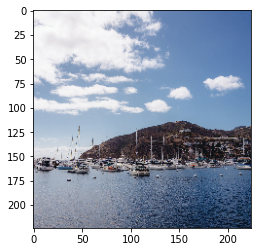

In [70]:
import matplotlib.pyplot as plt
plt.imshow(img)